<div style="background-color:#bf283c;">
    <p style="color:DarkTurquoise;font-size:1px"> |
    </p>
    </p>
    <p style="color:DarkTurquoise;font-size:1px"> |
    </p>
    <h1 style="color:White;font-family:'Arial';font-size:30px"><center>Telecom Churn Case Study</center></h1>
    </p>
    <p style="color:DarkTurquoise;font-size:1px"> |
    </p>
    <p style="text-align:left;font-family:'Courier New';color:FloralWhite;font-size:16px"> | Mobile: +91 9491392912 |
        <span style="float:right;font-family:'Courier New';color:White;font-size:16px"> | vamshi.krishna.prime@gmail.com |
        </span>
    </p>
    <p style="color:DarkTurquoise;font-size:1px"> |
    </p>
</div>



-------

# Table of contents:
1. [**Case Study Overview**](#1.-Case-Study-Overview)
  + 1.1. [Introduction](#1.1-Introduction:)
  + 1.2. [Business Understanding](#1.2-Business-Understanding:)
  + 1.3. [Business Usecase](#1.3-Business-Usecase:)
  + 1.4. [Software requirements](#1.4-Software-requirements:)
  + 1.5. [Business Objectives](#1.5-Business-Objectives:)


2. [**Explore Data**](#2.-Explore-Data) 
  + 2.1. [Load Data](#1.1-Gather-data-from-web:)
  + 2.2. [Data Dictionary](#1.2-Dictionary-Exploration:)
  + 2.3. [Dataset Exploration](#1.4-Dataset-Exploration:)

----

## 1. `Case Study Overview`
================================

In the telecommunication industry, customers tend to change operators if not provided with attractive schemes and offers. It is very important for any telecom operator to prevent the present customers from churning to other operators. As a data scientist, the task in this case study would be to build an ML model which can predict if the customer will churn or not in a particular month based on the past data.

## 2. `Data Exploration`
===========================

  + 2.1. [Load Libraries](#2.1-Load-Libraries:)
  + 2.2. [Load Data](#2.2-Load-Data:)
  + 2.2. [Data Dictionary](#2.2-Dictionary-Exploration:)
  + 2.3. [Dataset Exploration](#2.3-Dataset-Exploration:)

### <ins>[2](#2.-Explore-Data).1 Load Libraries:</ins>

Load relevant libraries at this section to ease the maintainance and tracking.

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.patches as patches
%matplotlib inline
import seaborn as sb
import traceback
import math
import datetime

### <ins>[2](#2.-Explore-Data).2 Load Data:</ins>

Import `data dictionary` to understand the variables:

In [2]:
# import data dictionary
try:
    info_df = pd.read_csv('data_dictionary.csv')
    print('Data Load: Successful')
except Exception:
    traceback.print_exc()
    print('Data Load: Failure')

Data Load: Successful


Import `Train` dataset:

In [3]:
# import data dictionary
try:
    train_df = pd.read_csv('train.csv', delimiter = ',')
    print('Data Load: Successful')
except Exception:
    traceback.print_exc()
    print('Data Load: Failure')

Data Load: Successful


### <ins>[2](#2.-Explore-Data).3 Understand Variables:</ins>

<ins> Visually inspect the `data dictionary` </ins>

In [4]:
info_df.style

<ins> Visually inspect the `train` data </ins>

+ Check the shape of the csv file loaded as the dataframe:

In [5]:
train_df.shape

(69999, 172)

+ Diaplay the first 5 rows in the dataset:

In [6]:
train_df.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0   0        109             0.0             0.0             0.0   
1   1        109             0.0             0.0             0.0   
2   2        109             0.0             0.0             0.0   
3   3        109             0.0             0.0             0.0   
4   4        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   31.277   
1            6/30/2014            7/31/2014            8/31/2014    0.000   
2            6/30/2014            7/31/2014            8/31/2014   60.806   
3            6/30/2014            7/31/2014            8/31/2014  156.362   
4            6/30/2014            7/31/2014            8/31/2014  240.708   

    arpu_7  ...  sachet_3g_7  sachet_3g_8  fb_user_6  fb_user_7  fb_user_8  \
0   87.009  ...            0            0        NaN        NaN        NaN   
1  122.787  ...            0            0        NaN        1.0        NaN   
2  103.176  ...            0            0        NaN        NaN        NaN   
3  205.260  ...            0            0        NaN        NaN        NaN   
4  128.191  ...            1            0        1.0        1.0        1.0   

    aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  churn_probability  
0  1958         0.0         0.0         0.0                  0  
1   710         0.0         0.0         0.0                  0  
2   882         0.0         0.0         0.0                  0  
3   982         0.0         0.0         0.0                  0  
4   647         0.0         0.0         0.0                  0  

[5 rows x 172 columns]

+ Display the bottom 5 rows in the dataset:

In [7]:
train_df.tail()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
69994  69994        109             0.0             0.0             0.0   
69995  69995        109             0.0             0.0             0.0   
69996  69996        109             0.0             0.0             0.0   
69997  69997        109             0.0             0.0             0.0   
69998  69998        109             0.0             0.0             0.0   

      last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
69994            6/30/2014            7/31/2014            8/31/2014   15.760   
69995            6/30/2014            7/31/2014            8/31/2014  160.083   
69996            6/30/2014            7/31/2014            8/31/2014  372.088   
69997            6/30/2014            7/31/2014            8/31/2014  238.575   
69998            6/30/2014            7/31/2014            8/31/2014  168.269   

        arpu_7  ...  sachet_3g_7  sachet_3g_8  fb_user_6  fb_user_7  \
69994  410.924  ...            1            0        NaN        1.0   
69995  289.129  ...            0            0        NaN        NaN   
69996  258.374  ...            0            0        NaN        NaN   
69997  245.414  ...            0            0        1.0        1.0   
69998   42.815  ...            0            0        1.0        NaN   

       fb_user_8   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  churn_probability  
69994        1.0   221        0.00        0.00        0.00                  0  
69995        NaN   712        0.00        0.00        0.00                  0  
69996        NaN   879        0.00        0.00        0.00                  0  
69997        1.0   277      664.25     1402.96      990.97                  0  
69998        1.0  1876        0.00        0.00        0.00                  0  

[5 rows x 172 columns]

+ List the columns in the data:

In [8]:
train_df.columns

Index(['id', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'arpu_6', 'arpu_7',
       ...
       'sachet_3g_7', 'sachet_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'churn_probability'],
      dtype='object', length=172)

### <ins>[2](#2.-Explore-Data).3 Understand Dataset:</ins>

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


In [10]:
def programmatic_assessment(df):
    '''
    Returns a dataframe with variables as null counts, duplicate counts, and descriptive statistics of each variable/column in the input dataframe.
    
    Input args:
    df = dataframe
    
    output args:
    df = dataframe tabulating statistics of each variable.
    '''
    cols = df.columns
    assess_df = pd.DataFrame()
    
    for i, col in enumerate(cols):
        assess_df.loc[i, 'variable'] = col
        assess_df.loc[i, 'datatype'] = df[col].dtype
        assess_df.loc[i, 'null_count'] = df[col].isna().sum()
        assess_df.loc[i, 'null_pcnt'] = (df[col].isna().sum()) / df.shape[0]
        assess_df.loc[i, 'duplicate_count'] = df[col].duplicated().sum()
        assess_df.loc[i, 'count'] = df[col].describe()['count']

        # tabulate descriptive statistics for numerical variable
        if df[col].dtype in ['int64', 'float64']:
            assess_df.loc[i, 'mean'] = df[col].describe()['mean']
            assess_df.loc[i, 'std'] = df[col].describe()['std']
            assess_df.loc[i, 'min'] = df[col].describe()['min']
            assess_df.loc[i, '25%'] = df[col].describe()['25%']
            assess_df.loc[i, '50%'] = df[col].describe()['50%']
            assess_df.loc[i, '75%'] = df[col].describe()['75%']
            assess_df.loc[i, 'max'] = df[col].describe()['max']
        
        # tabulate descriptive statistics for categorical variable
        elif df[col].dtype in ['O']:
            assess_df.loc[i, 'unique'] = df[col].describe()['unique']
            assess_df.loc[i, 'top'] = df[col].describe()['top']
            assess_df.loc[i, 'freq'] = df[col].describe()['freq']
    
    return assess_df


def highlight_positives(x, color):
    '''
    highlight values greater than 0 in the input column of the dataframe.
    
    input args:
    color: color of the text to be displayed.
    '''
    return np.where(x > 0, f"color: {color};", None)


def highlight_values(x, color, threshold):
    '''
    highlight values greater than 0 in the input column of the dataframe.
    
    input args:
    color: color of the text to be displayed.
    threshold: value greater than which displayed in the specified color.
    '''
    return np.where(x > threshold, f"color: {color}; background-color: lightyellow;", None)

In [11]:
assess_df = programmatic_assessment(train_df)
assess_df.style.apply(highlight_positives, color='red', axis=1, subset="null_count")  

Filter variables with `null_count` greater than zero, sort them by descending order, and highlight the null count in `red` color .

In [12]:
# filter variables with null_count greater than zero, sort them by descending order, and highlight the null count in red color 
assess_df[assess_df['null_count']>0].sort_values(by=['datatype', 'null_count'], 
                                                                ascending=False).style.apply(highlight_values, 
                                                                                             color='red',
                                                                                             threshold=0.7,
                                                                                             axis=1, 
                                                                                             subset="null_pcnt")

However, the columns with null count are not dropped from the dataset as it could be a pattern on a time series. Impute with value `0` if appropriate.

In [13]:
train_df.std().values

array([2.02071151e+04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.34213918e+02, 3.44366927e+02, 3.51924315e+02,
       2.99963093e+02, 3.11277193e+02, 3.11896596e+02, 3.16818355e+02,
       3.22482226e+02, 3.24089234e+02, 5.73744292e+01, 5.59609854e+01,
       5.34081346e+01, 7.34692609e+01, 5.85118935e+01, 6.46183885e+01,
       1.50971758e+02, 1.54739002e+02, 1.53716880e+02, 1.62046699e+02,
       1.53852597e+02, 1.52997805e+02, 1.33195423e+01, 1.35681104e+01,
       1.30091929e+01, 5.74181127e+00, 7.91411335e+00, 6.54220214e+00,
       2.52034597e+02, 2.46313148e+02, 2.45342359e+02, 2.55098355e+02,
       2.66693254e+02, 2.67021929e+02, 2.55771554e+02, 2.67532089e+02,
       2.70032002e+02, 8.13664503e+00, 8.32520612e+00, 7.69685270e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.92046600e+02,
       4.09299501e+02, 4.10697098e+02, 2.97474857e+01, 2.92200735e+01,
       2.95633665e+01, 1.58545287e+01, 2.22298416e+01, 1.77085071e+01,
      

----

### Exploratory Data Analysis

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [15]:
id_cols = ["id",'circle_id']

date_cols = ['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8']


cat_cols =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'fb_user_6',
             'fb_user_7',
             'fb_user_8'
            ]

len_rows, len_col = train_df.shape
num_cols = [column for column in train_df.columns if column not in id_cols + date_cols + cat_cols]

# print the number of columns in each list
print("#ID cols: %d\n#Date cols:%d\n#Numeric cols:%d\n#Category cols:%d" % (len(id_cols), len(date_cols), len(num_cols), len(cat_cols)))

# check if we have missed any column or not
assert len(id_cols) + len(date_cols) + len(num_cols) + len(cat_cols) == len_col

#ID cols: 2
#Date cols:9
#Numeric cols:155
#Category cols:6


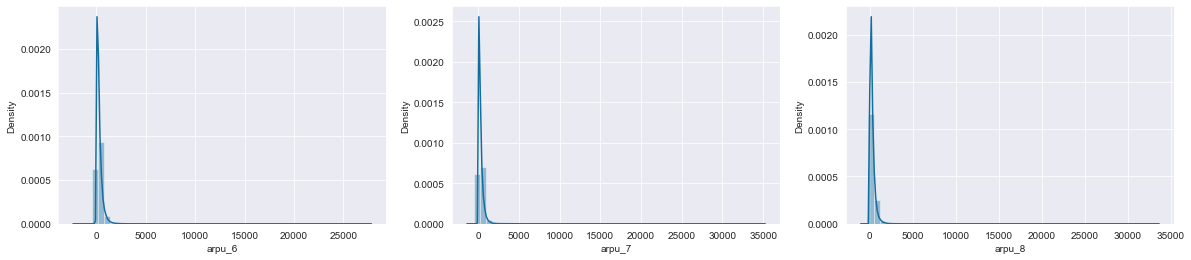

In [16]:
plt.figure(figsize=(20, 4))
sb.set_style("darkgrid")
sb.set_palette(palette = 'colorblind', n_colors = 10, desat = 0.8)
current_palette = sb.color_palette()

plt.subplot(1,3,1)
sns.distplot(train_df['arpu_6'])
plt.subplot(1,3,2)
sns.distplot(train_df['arpu_7'])
plt.subplot(1,3,3)
sns.distplot(train_df['arpu_8']);

The above plots depicts that the distribution of data is left skewed. Which is an indication that very less proportion of users have spent high average revenue while more users spent low average revenue.

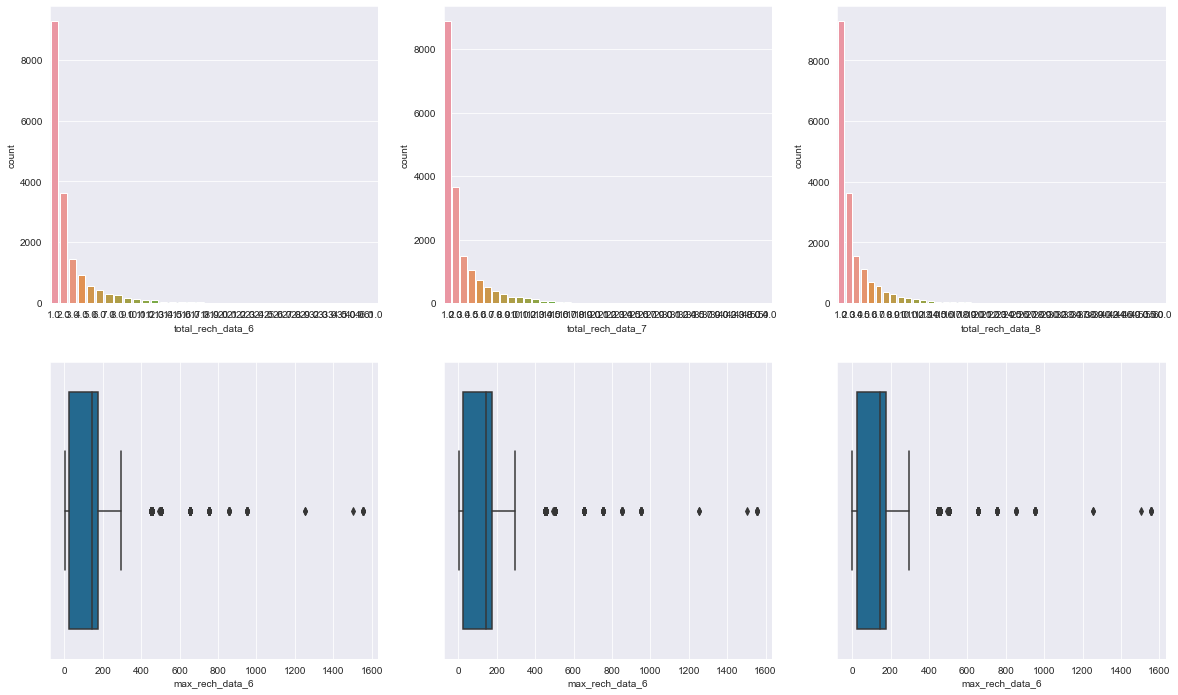

In [17]:
plt.figure(figsize=(20, 12))
sb.set_style("darkgrid")
sb.set_palette(palette = 'colorblind', n_colors = 10, desat = 0.8)
current_palette = sb.color_palette()

plt.subplot(2,3,1)
sns.countplot(x = 'total_rech_data_6', data = train_df)
plt.subplot(2,3,2)
sns.countplot(x = 'total_rech_data_7',  data = train_df)
plt.subplot(2,3,3)
sns.countplot(x = 'total_rech_data_8', data = train_df)
plt.subplot(2,3,4)
sns.boxplot(x = 'max_rech_data_6', data = train_df)
plt.subplot(2,3,5)
sns.boxplot(x = 'max_rech_data_6',  data = train_df)
plt.subplot(2,3,6)
sns.boxplot(x = 'max_rech_data_6', data = train_df)
plt.show();

The above plots depict that the Total reach data of month 6, 7 and 8 are right skewed and Max_reach_data of every month is having outliers

## Data Warangling:

Take a backup of the data prior to data manipulation:

In [18]:
telchurn = train_df.copy(deep=True)

### <ins> Handling Missing Values</ins>

In [19]:
telchurn.isnull().sum()*100/telchurn.shape[0]

id                   0.000000
circle_id            0.000000
loc_og_t2o_mou       1.002871
std_og_t2o_mou       1.002871
loc_ic_t2o_mou       1.002871
                       ...   
aon                  0.000000
aug_vbc_3g           0.000000
jul_vbc_3g           0.000000
jun_vbc_3g           0.000000
churn_probability    0.000000
Length: 172, dtype: float64

Check for standard deviation to understand the variance:

In [20]:
# check for standard deviation
telchurn.std() 

id                   20207.115084
circle_id                0.000000
loc_og_t2o_mou           0.000000
std_og_t2o_mou           0.000000
loc_ic_t2o_mou           0.000000
                         ...     
aon                    952.426321
aug_vbc_3g             269.328659
jul_vbc_3g             267.899034
jun_vbc_3g             257.226810
churn_probability        0.302502
Length: 163, dtype: float64

### <ins>Imputing missing values</ins>

In [21]:
# Imputing with zeroes
recharge_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
                 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
                 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8',
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
                 ]

telchurn[recharge_cols].describe(include='all')

total_rech_data_6  total_rech_data_7  total_rech_data_8  \
count       17568.000000       17865.000000       18417.000000   
mean            2.467612           2.679989           2.652441   
std             2.794610           3.073472           3.101265   
min             1.000000           1.000000           1.000000   
25%             1.000000           1.000000           1.000000   
50%             1.000000           2.000000           1.000000   
75%             3.000000           3.000000           3.000000   
max            61.000000          54.000000          60.000000   

       count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  count_rech_3g_6  \
count     17568.000000     17865.000000     18417.000000     17568.000000   
mean          1.865323         2.056311         2.016018         0.602288   
std           2.566377         2.799916         2.728246         1.279297   
min           0.000000         0.000000         0.000000         0.000000   
25%           1.000000         1.000000         1.000000         0.000000   
50%           1.000000         1.000000         1.000000         0.000000   
75%           2.000000         2.000000         2.000000         1.000000   
max          42.000000        48.000000        44.000000        29.000000   

       count_rech_3g_7  count_rech_3g_8  max_rech_data_6  max_rech_data_7  \
count     17865.000000     18417.000000     17568.000000     17865.000000   
mean          0.623678         0.636423       126.500000       126.402071   
std           1.401230         1.457058       109.352573       109.459266   
min           0.000000         0.000000         1.000000         1.000000   
25%           0.000000         0.000000        25.000000        25.000000   
50%           0.000000         0.000000       145.000000       145.000000   
75%           1.000000         1.000000       177.000000       177.000000   
max          34.000000        45.000000      1555.000000      1555.000000   

       max_rech_data_8  av_rech_amt_data_6  av_rech_amt_data_7  \
count     18417.000000        17568.000000        17865.000000   
mean        125.374925          192.831096          201.455940   
std         109.648799          190.623115          198.346141   
min           1.000000            1.000000            1.000000   
25%          25.000000           82.000000           92.000000   
50%         145.000000          154.000000          154.000000   
75%         179.000000          252.000000          252.000000   
max        1555.000000         5920.000000         4365.000000   

       av_rech_amt_data_8  
count        18417.000000  
mean           196.815792  
std            192.280532  
min              1.000000  
25%             84.000000  
50%            154.000000  
75%            252.000000  
max           4076.000000

Explore `total_rech_data_6`,`date_of_last_rech_data_6` columns:

In [22]:
telchurn.loc[telchurn.total_rech_data_6.isnull() & telchurn.date_of_last_rech_data_6.isnull(),
             ["total_rech_data_6", "date_of_last_rech_data_6"]].head(10)

total_rech_data_6 date_of_last_rech_data_6
0                 NaN                      NaN
1                 NaN                      NaN
2                 NaN                      NaN
3                 NaN                      NaN
5                 NaN                      NaN
6                 NaN                      NaN
8                 NaN                      NaN
9                 NaN                      NaN
11                NaN                      NaN
12                NaN                      NaN

Suppose a customer is not reacharging on a particular date of a month , then total_rech_data_ofmonth , date_of_last_rech_data_of month values remains empty

In [23]:
zero_impute = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
               'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 
               'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8']

telchurn[zero_impute] = telchurn[zero_impute].apply(lambda x: x.fillna(0))

Validate the data imputation:

In [24]:
# Validate whether missing values are imputed correctly or not
print("Missing value ratio:\n")
print(telchurn[zero_impute].isnull().sum()*100/telchurn.shape[1])

Missing value ratio:

total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
dtype: float64


In [25]:
# summary
print("\n\nSummary statistics:\n"+ '-'*20)
print(telchurn[zero_impute].describe(include='all'))



Summary statistics:
--------------------
       total_rech_data_6  total_rech_data_7  total_rech_data_8  \
count       69999.000000       69999.000000       69999.000000   
mean            0.619309           0.683981           0.697867   
std             1.762010           1.943193           1.973434   
min             0.000000           0.000000           0.000000   
25%             0.000000           0.000000           0.000000   
50%             0.000000           0.000000           0.000000   
75%             1.000000           1.000000           1.000000   
max            61.000000          54.000000          60.000000   

       av_rech_amt_data_6  av_rech_amt_data_7  av_rech_amt_data_8  \
count        69999.000000        69999.000000        69999.000000   
mean            48.395787           51.415168           51.782975   
std            126.923180          133.246541          131.291162   
min              0.000000            0.000000            0.000000   
25%              

In [26]:
print("Shape before dropping: ", telchurn.shape)
telchurn = telchurn.drop(id_cols + date_cols, axis=1)
print("Shape after dropping: ", telchurn.shape)

Shape before dropping:  (69999, 172)
Shape after dropping:  (69999, 161)


### <ins>Imputing missing values in categorical variables:</ins>

In [27]:
telchurn[cat_cols] = telchurn[cat_cols].apply(lambda x: x.fillna(-1))

In [28]:
print("Missing value ratio:\n")
print(telchurn[cat_cols].isnull().sum()*100/telchurn.shape[0])

Missing value ratio:

night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
dtype: float64


### <ins>Drop variables based on threshold of missing values:</ins>

In [29]:
initial_cols = telchurn.shape[1]

MISSING_THRESHOLD = 0.7

include_cols = list(telchurn.apply(lambda column: True if column.isnull().sum()/telchurn.shape[0] < MISSING_THRESHOLD else False))

drop_missing = pd.DataFrame({'features':telchurn.columns , 'include': include_cols})
drop_missing.loc[drop_missing.include == True,:]

features  include
0       loc_og_t2o_mou     True
1       std_og_t2o_mou     True
2       loc_ic_t2o_mou     True
3               arpu_6     True
4               arpu_7     True
..                 ...      ...
156                aon     True
157         aug_vbc_3g     True
158         jul_vbc_3g     True
159         jun_vbc_3g     True
160  churn_probability     True

[149 rows x 2 columns]

Check for the count of variables dropped from the analysis:

In [30]:
telchurn = telchurn.loc[:, include_cols]

dropped_cols = telchurn.shape[1] - initial_cols
print("{0} columns dropped.".format(dropped_cols))## iv) imputing using MICE

-12 columns dropped.


Iterate the process:

In [31]:
telchurn.isna().any()

loc_og_t2o_mou        True
std_og_t2o_mou        True
loc_ic_t2o_mou        True
arpu_6               False
arpu_7               False
                     ...  
aon                  False
aug_vbc_3g           False
jul_vbc_3g           False
jun_vbc_3g           False
churn_probability    False
Length: 149, dtype: bool

In [32]:
telchurn.std()

loc_og_t2o_mou         0.000000
std_og_t2o_mou         0.000000
loc_ic_t2o_mou         0.000000
arpu_6               334.213918
arpu_7               344.366927
                        ...    
aon                  952.426321
aug_vbc_3g           269.328659
jul_vbc_3g           267.899034
jun_vbc_3g           257.226810
churn_probability      0.302502
Length: 149, dtype: float64

In [33]:
same_val_col = ["loc_og_t2o_mou","std_og_t2o_mou","loc_ic_t2o_mou"]
telchurn = telchurn.drop(same_val_col, axis=1)

In [34]:
telchurn.isna().any()

arpu_6               False
arpu_7               False
arpu_8               False
onnet_mou_6           True
onnet_mou_7           True
                     ...  
aon                  False
aug_vbc_3g           False
jul_vbc_3g           False
jun_vbc_3g           False
churn_probability    False
Length: 146, dtype: bool

In [35]:
nan_list = telchurn.columns[telchurn.isna().any()].tolist()

In [36]:
for i in nan_list:    
    telchurn[i] = telchurn[i].fillna(0)

In [37]:
telchurn.columns[telchurn.isna().any()].tolist()

[]

In [38]:
print(telchurn.isnull().sum()*100/telchurn.shape[0])

arpu_6               0.0
arpu_7               0.0
arpu_8               0.0
onnet_mou_6          0.0
onnet_mou_7          0.0
                    ... 
aon                  0.0
aug_vbc_3g           0.0
jul_vbc_3g           0.0
jun_vbc_3g           0.0
churn_probability    0.0
Length: 146, dtype: float64


------

## Data Trasformation:

Categorize the customers into `High value customers` and `generic` based on the revenue/value generation. Calculation based on the past data which is for the month of june and july.

Formula to calculate `total data recharge amount` = `number of recharges` * `avg recharge amount`

In [39]:
telchurn['total_data_rech_6'] = telchurn.total_rech_data_6 * telchurn.av_rech_amt_data_6
telchurn['total_data_rech_7'] = telchurn.total_rech_data_7 * telchurn.av_rech_amt_data_7

To find the `total amount spent by the customer` for recharge for a particular month =  `total data recharge` + `total recharge` 

In [40]:
# calculate total recharge amount for June and July --> call recharge amount + data recharge amount
telchurn['amt_data_6'] = telchurn.total_rech_amt_6 + telchurn.total_data_rech_6
telchurn['amt_data_7'] = telchurn.total_rech_amt_7 + telchurn.total_data_rech_7

In [41]:
# calculate average recharge done by customer in June and July
telchurn['av_amt_data_6_7'] = (telchurn.amt_data_6 + telchurn.amt_data_7)/2

Here high value customers are treated as those who spent greater than the 70 percentile, choise can be 80 percentile also

In [42]:
# look at the 70th percentile recharge amount
print("Recharge amount at 70th percentile: {0}".format(telchurn.av_amt_data_6_7.quantile(0.7)))

Recharge amount at 70th percentile: 477.5


In [43]:
# retain only those customers who have recharged their mobiles with more than or equal to 70th percentile amount
telchurn_churn_filtered = telchurn.loc[telchurn.av_amt_data_6_7 >= telchurn.av_amt_data_6_7.quantile(0.7), :]
telchurn_churn_filtered = telchurn_churn_filtered.reset_index(drop=True)
telchurn_churn_filtered.shape

(21013, 151)

In [44]:
# delete variables created to filter high-value customers
telchurn_churn_filtered = telchurn_churn_filtered.drop(['total_data_rech_6', 'total_data_rech_7',
                                                        'amt_data_6', 'amt_data_7', 'av_amt_data_6_7'], axis=1)
telchurn_churn_filtered.shape

(21013, 146)

21013 rows reamins after selecting the customers who have provided recharge value of more than or equal to the recharge value of the 70th percentile customer.

### Calculating the difference between the 8th month and the average of the 6th and 7 th month

In [45]:
telchurn_churn_filtered['arpu_diff'] = telchurn_churn_filtered.arpu_8 - ((telchurn_churn_filtered.arpu_6 + telchurn_churn_filtered.arpu_7)/2)
telchurn_churn_filtered['onnet_mou_diff'] = telchurn_churn_filtered.onnet_mou_8 - ((telchurn_churn_filtered.onnet_mou_6 + telchurn_churn_filtered.onnet_mou_7)/2)
telchurn_churn_filtered['offnet_mou_diff'] = telchurn_churn_filtered.offnet_mou_8 - ((telchurn_churn_filtered.offnet_mou_6 + telchurn_churn_filtered.offnet_mou_7)/2)
telchurn_churn_filtered['roam_ic_mou_diff'] = telchurn_churn_filtered.roam_ic_mou_8 - ((telchurn_churn_filtered.roam_ic_mou_6 + telchurn_churn_filtered.roam_ic_mou_7)/2)
telchurn_churn_filtered['roam_og_mou_diff'] = telchurn_churn_filtered.roam_og_mou_8 - ((telchurn_churn_filtered.roam_og_mou_6 + telchurn_churn_filtered.roam_og_mou_7)/2)
telchurn_churn_filtered['loc_og_mou_diff'] = telchurn_churn_filtered.loc_og_mou_8 - ((telchurn_churn_filtered.loc_og_mou_6 + telchurn_churn_filtered.loc_og_mou_7)/2)
telchurn_churn_filtered['std_og_mou_diff'] = telchurn_churn_filtered.std_og_mou_8 - ((telchurn_churn_filtered.std_og_mou_6 + telchurn_churn_filtered.std_og_mou_7)/2)
telchurn_churn_filtered['isd_og_mou_diff'] = telchurn_churn_filtered.isd_og_mou_8 - ((telchurn_churn_filtered.isd_og_mou_6 + telchurn_churn_filtered.isd_og_mou_7)/2)
telchurn_churn_filtered['spl_og_mou_diff'] = telchurn_churn_filtered.spl_og_mou_8 - ((telchurn_churn_filtered.spl_og_mou_6 + telchurn_churn_filtered.spl_og_mou_7)/2)
telchurn_churn_filtered['total_og_mou_diff'] = telchurn_churn_filtered.total_og_mou_8 - ((telchurn_churn_filtered.total_og_mou_6 + telchurn_churn_filtered.total_og_mou_7)/2)
telchurn_churn_filtered['loc_ic_mou_diff'] = telchurn_churn_filtered.loc_ic_mou_8 - ((telchurn_churn_filtered.loc_ic_mou_6 + telchurn_churn_filtered.loc_ic_mou_7)/2)
telchurn_churn_filtered['std_ic_mou_diff'] = telchurn_churn_filtered.std_ic_mou_8 - ((telchurn_churn_filtered.std_ic_mou_6 + telchurn_churn_filtered.std_ic_mou_7)/2)
telchurn_churn_filtered['isd_ic_mou_diff'] = telchurn_churn_filtered.isd_ic_mou_8 - ((telchurn_churn_filtered.isd_ic_mou_6 + telchurn_churn_filtered.isd_ic_mou_7)/2)
telchurn_churn_filtered['spl_ic_mou_diff'] = telchurn_churn_filtered.spl_ic_mou_8 - ((telchurn_churn_filtered.spl_ic_mou_6 + telchurn_churn_filtered.spl_ic_mou_7)/2)
telchurn_churn_filtered['total_ic_mou_diff'] = telchurn_churn_filtered.total_ic_mou_8 - ((telchurn_churn_filtered.total_ic_mou_6 + telchurn_churn_filtered.total_ic_mou_7)/2)
telchurn_churn_filtered['total_rech_num_diff'] = telchurn_churn_filtered.total_rech_num_8 - ((telchurn_churn_filtered.total_rech_num_6 + telchurn_churn_filtered.total_rech_num_7)/2)
telchurn_churn_filtered['total_rech_amt_diff'] = telchurn_churn_filtered.total_rech_amt_8 - ((telchurn_churn_filtered.total_rech_amt_6 + telchurn_churn_filtered.total_rech_amt_7)/2)
telchurn_churn_filtered['max_rech_amt_diff'] = telchurn_churn_filtered.max_rech_amt_8 - ((telchurn_churn_filtered.max_rech_amt_6 + telchurn_churn_filtered.max_rech_amt_7)/2)
telchurn_churn_filtered['total_rech_data_diff'] = telchurn_churn_filtered.total_rech_data_8 - ((telchurn_churn_filtered.total_rech_data_6 + telchurn_churn_filtered.total_rech_data_7)/2)
telchurn_churn_filtered['max_rech_data_diff'] = telchurn_churn_filtered.max_rech_data_8 - ((telchurn_churn_filtered.max_rech_data_6 + telchurn_churn_filtered.max_rech_data_7)/2)
telchurn_churn_filtered['av_rech_amt_data_diff'] = telchurn_churn_filtered.av_rech_amt_data_8 - ((telchurn_churn_filtered.av_rech_amt_data_6 + telchurn_churn_filtered.av_rech_amt_data_7)/2)
telchurn_churn_filtered['vol_2g_mb_diff'] = telchurn_churn_filtered.vol_2g_mb_8 - ((telchurn_churn_filtered.vol_2g_mb_6 + telchurn_churn_filtered.vol_2g_mb_7)/2)
telchurn_churn_filtered['vol_3g_mb_diff'] = telchurn_churn_filtered.vol_3g_mb_8 - ((telchurn_churn_filtered.vol_3g_mb_6 + telchurn_churn_filtered.vol_3g_mb_7)/2)

In [46]:
# summary of one of the difference variables
telchurn_churn_filtered['max_rech_amt_diff'].describe()

count    21013.000000
mean       -10.423048
std        132.730444
min      -1901.000000
25%        -33.000000
50%          0.000000
75%         25.000000
max       3949.000000
Name: max_rech_amt_diff, dtype: float64

In [47]:
cat_cols

['night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8']

In [48]:
num_cols = [column for column in telchurn_churn_filtered.columns if column not in cat_cols]
len(num_cols)

163

----

## Univariate Analysis:

In [49]:
def data_type(variable):
    if variable.dtype == np.int64 or variable.dtype == np.float64:
        return 'numerical'
    elif variable.dtype == 'category':
        return 'categorical'
    
def univariate(variable, stats=True):
    if data_type(variable) == 'numerical':
        sns.distplot(variable)
        if stats == True:
            print(variable.describe())
    elif data_type(variable) == 'categorical':
        sns.countplot(variable)
        if stats == True:
            print(variable.value_counts())
    else:
        print("Invalid variable passed: either pass a numeric variable or a categorical vairable.")

count    69999.000000
mean       283.134365
std        334.213918
min      -2258.709000
25%         93.581000
50%        197.484000
75%        370.791000
max      27731.088000
Name: arpu_6, dtype: float64


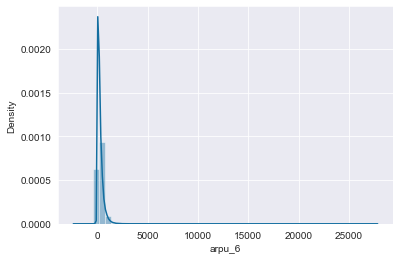

In [50]:
univariate(telchurn.arpu_6)

count    69999.000000
mean       278.185912
std        344.366927
min      -1289.715000
25%         86.714000
50%        191.588000
75%        365.369500
max      35145.834000
Name: arpu_7, dtype: float64


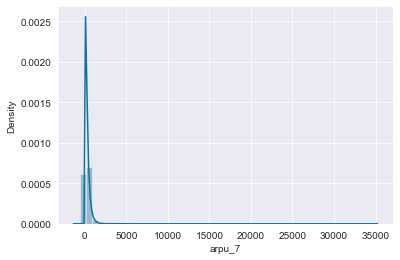

In [51]:
univariate(telchurn.arpu_7)

count    69999.000000
mean       278.858826
std        351.924315
min       -945.808000
25%         84.095000
50%        192.234000
75%        369.909000
max      33543.624000
Name: arpu_8, dtype: float64


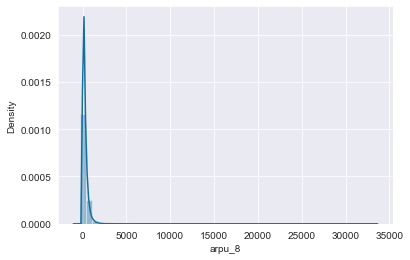

In [52]:
univariate(telchurn.arpu_8)

count    69999.000000
mean       125.943607
std        304.990552
min          0.000000
25%          4.110000
50%         27.840000
75%        106.280000
max      10752.560000
Name: onnet_mou_8, dtype: float64


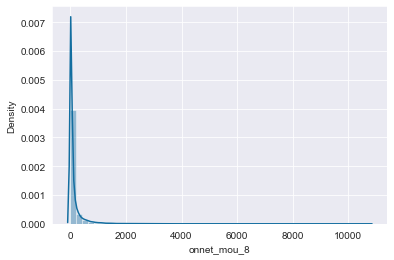

In [53]:
univariate(telchurn.onnet_mou_8)

## Bivariate Analysis:

In [54]:
def bivariate(var1, var2):
    if data_type(var1) == 'numerical' and data_type(var2) == 'numerical':
        sns.regplot(var1, var2)
    elif (data_type(var1) == 'categorical' and data_type(var2) == 'numerical') or (data_type(var1) == 'numerical' and data_type(var2) == 'categorical'):        
        sns.boxplot(var1, var2)

In [55]:
telchurn_churn_filtered.head()

arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0   240.708  128.191  101.565        21.28         4.83         6.13   
1   580.549  377.294  338.286        10.43        24.99       194.43   
2  1130.948  905.506  479.762       859.53       372.71         0.89   
3   371.974  352.069  240.449        93.18        38.29        29.86   
4   390.489  350.985  421.300         8.58        11.48        12.68   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  ...  \
0         56.99         38.11          9.63          53.64  ...   
1        317.11        341.79        197.09           0.00  ...   
2        293.46        450.11        386.91           0.00  ...   
3        531.19        507.76        222.03           0.00  ...   
4        133.16        158.73        182.83           0.00  ...   

   spl_ic_mou_diff  total_ic_mou_diff  total_rech_num_diff  \
0            0.000             12.860                 -3.5   
1            0.000            124.655                  0.0   
2           -0.065           -320.160                -12.5   
3            0.000              0.080                  3.0   
4            0.000             26.105                 -6.5   

   total_rech_amt_diff  max_rech_amt_diff  total_rech_data_diff  \
0                -91.0              -15.5                  -1.0   
1                125.0                0.0                   0.5   
2               -711.0               34.0                   0.0   
3               -193.5              -80.0                  -0.5   
4               -318.5              -13.0                   0.0   

   max_rech_data_diff  av_rech_amt_data_diff  vol_2g_mb_diff  vol_3g_mb_diff  
0                -8.0                  -41.0        -136.375            0.00  
1                77.0                   77.0         224.140            0.00  
2                 0.0                    0.0           0.000            0.00  
3                 0.0                  -11.5          -0.020            0.00  
4                11.0                  -40.5         -38.920         1017.89  

[5 rows x 169 columns]

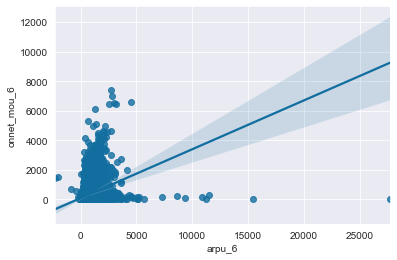

In [56]:
bivariate(telchurn_churn_filtered.arpu_6, telchurn_churn_filtered.onnet_mou_6)

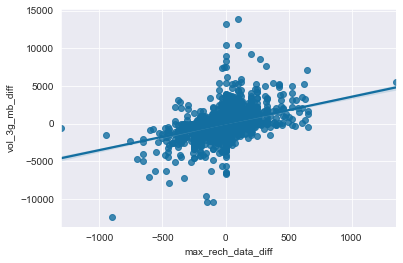

In [57]:
bivariate(telchurn_churn_filtered.max_rech_data_diff, telchurn_churn_filtered.vol_3g_mb_diff)

In [58]:
pd.crosstab(telchurn_churn_filtered.night_pck_user_8, telchurn_churn_filtered.sachet_3g_8)

sachet_3g_8         0     1    2    3   4   5   6   7   8   9   ...  18  19  \
night_pck_user_8                                                ...           
-1.0              9833     0    0    0   0   0   0   0   0   0  ...   0   0   
 0.0              9219  1117  264  118  60  48  25  19  17  10  ...   3   1   
 1.0                84    60   18   20   9  14   4   5   5   4  ...   0   0   

sachet_3g_8       20  21  23  25  29  30  38  41  
night_pck_user_8                                  
-1.0               0   0   0   0   0   0   0   0  
 0.0               3   1   1   0   1   0   1   1  
 1.0               0   1   1   1   0   1   0   0  

[3 rows x 28 columns]

### <ins>Cap outliers in all numeric variables with k-sigma technique</ins>

In [59]:
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

In [60]:
sample_array = list(range(100))

# add outliers to the data
sample_array[0] = -9999
sample_array[99] = 9999

# cap outliers
sample_array = np.array(sample_array)
print("Array after capping outliers: \n", cap_outliers(sample_array, k=2))

Array after capping outliers: 
 [-2780     1     2     3     4     5     6     7     8     9    10    11
    12    13    14    15    16    17    18    19    20    21    22    23
    24    25    26    27    28    29    30    31    32    33    34    35
    36    37    38    39    40    41    42    43    44    45    46    47
    48    49    50    51    52    53    54    55    56    57    58    59
    60    61    62    63    64    65    66    67    68    69    70    71
    72    73    74    75    76    77    78    79    80    81    82    83
    84    85    86    87    88    89    90    91    92    93    94    95
    96    97    98  2877]


In [61]:
# cap outliers in the numeric columns
telchurn_churn_filtered[num_cols] = telchurn_churn_filtered[num_cols].apply(cap_outliers, axis=0)

## Multivariate Ananlysis:

In [62]:
telchurn_numeric = telchurn_churn_filtered[num_cols]
telchurn_numeric

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0       240.708   128.191   101.565        21.28         4.83         6.13   
1       580.549   377.294   338.286        10.43        24.99       194.43   
2      1130.948   905.506   479.762       859.53       372.71         0.89   
3       371.974   352.069   240.449        93.18        38.29        29.86   
4       390.489   350.985   421.300         8.58        11.48        12.68   
...         ...       ...       ...          ...          ...          ...   
21008  1106.130  1609.381  1686.392        84.91       133.44       178.08   
21009   196.695   298.645   192.440         1.05         0.00         5.83   
21010   235.524   195.633   129.598        45.08        94.31         8.34   
21011    15.760   410.924   329.136         0.00         7.36        10.93   
21012   238.575   245.414   145.062        14.01         7.64         6.71   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  ...  \
0             56.99         38.11          9.63          53.64  ...   
1            317.11        341.79        197.09           0.00  ...   
2            293.46        450.11        386.91           0.00  ...   
3            531.19        507.76        222.03           0.00  ...   
4            133.16        158.73        182.83           0.00  ...   
...             ...           ...           ...            ...  ...   
21008        823.86        645.89        703.19           0.00  ...   
21009         44.74         32.16         30.93           0.00  ...   
21010        111.51        236.61         91.54           0.00  ...   
21011          0.00        488.46        381.64          14.96  ...   
21012         30.34         16.68         12.56          25.06  ...   

       spl_ic_mou_diff  total_ic_mou_diff  total_rech_num_diff  \
0                0.000             12.860                 -3.5   
1                0.000            124.655                  0.0   
2               -0.065           -320.160                -12.5   
3                0.000              0.080                  3.0   
4                0.000             26.105                 -6.5   
...                ...                ...                  ...   
21008            0.000              9.810                 -1.0   
21009           -0.095             -4.695                 -2.0   
21010            0.000            -97.955                 -4.0   
21011            0.000            158.565                  4.0   
21012            0.000              0.225                 -2.0   

       total_rech_amt_diff  max_rech_amt_diff  total_rech_data_diff  \
0                    -91.0         -15.500000                  -1.0   
1                    125.0           0.000000                   0.5   
2                   -711.0          34.000000                   0.0   
3                   -193.5         -80.000000                  -0.5   
4                   -318.5         -13.000000                   0.0   
...                    ...                ...                   ...   
21008                552.0         387.768284                  -1.5   
21009               -111.0         -14.000000                  -1.5   
21010                -91.5          -0.500000                  -5.5   
21011                288.5          50.000000                  -2.5   
21012               -170.5         -81.000000                   0.0   

       max_rech_data_diff  av_rech_amt_data_diff  vol_2g_mb_diff  \
0                    -8.0                  -41.0        -136.375   
1                    77.0                   77.0         224.140   
2                     0.0                    0.0           0.000   
3                     0.0                  -11.5          -0.020   
4                    11.0                  -40.5         -38.920   
...                   ...                    ...             ...   
21008               -76.0                 -224.5          -0.360   
21009                 0.0    

In [63]:
# Correlation matrix
cor = telchurn_numeric.corr()
cor

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
arpu_6                 1.000000  0.586362  0.501452     0.430119     0.279857   
arpu_7                 0.586362  1.000000  0.690120     0.282407     0.419770   
arpu_8                 0.501452  0.690120  1.000000     0.200814     0.299652   
onnet_mou_6            0.430119  0.282407  0.200814     1.000000     0.779622   
onnet_mou_7            0.279857  0.419770  0.299652     0.779622     1.000000   
...                         ...       ...       ...          ...          ...   
total_rech_data_diff   0.048640  0.079665  0.213139     0.052274     0.066212   
max_rech_data_diff    -0.004060  0.041971  0.219765     0.040704     0.047225   
av_rech_amt_data_diff -0.002464  0.034692  0.272121     0.049691     0.060206   
vol_2g_mb_diff         0.025108  0.055187  0.112700     0.040981     0.051115   
vol_3g_mb_diff        -0.045151  0.018964  0.184229     0.019481     0.027161   

                       onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
arpu_6                    0.248881      0.597043      0.391466      0.345670   
arpu_7                    0.361100      0.401375      0.574563      0.478608   
arpu_8                    0.453203      0.315521      0.439337      0.624135   
onnet_mou_6               0.663355      0.116079      0.064316      0.063291   
onnet_mou_7               0.816120      0.063987      0.111920      0.103502   
...                            ...           ...           ...           ...   
total_rech_data_diff      0.080085      0.085461      0.092335      0.109554   
max_rech_data_diff        0.058654      0.055573      0.064888      0.082442   
av_rech_amt_data_diff     0.069457      0.075034      0.082796      0.100157   
vol_2g_mb_diff            0.054523      0.052383      0.059541      0.058895   
vol_3g_mb_diff            0.029444      0.031437      0.042183      0.054460   

                       roam_ic_mou_6  ...  spl_ic_mou_diff  total_ic_mou_diff  \
arpu_6                      0.161524  ...        -0.020918          -0.118421   
arpu_7                      0.136504  ...        -0.006689           0.011345   
arpu_8                      0.132482  ...         0.012530           0.196034   
onnet_mou_6                 0.034440  ...        -0.037531          -0.067139   
onnet_mou_7                 0.057619  ...        -0.046611           0.002737   
...                              ...  ...              ...                ...   
total_rech_data_diff        0.038162  ...         0.015885           0.050462   
max_rech_data_diff          0.012810  ...         0.022153           0.044678   
av_rech_amt_data_diff       0.031745  ...         0.021371           0.042880   
vol_2g_mb_diff             -0.002067  ...         0.014203           0.012609   
vol_3g_mb_diff              0.028102  ...         0.005277           0.042216   

                       total_rech_num_diff  total_rech_amt_diff  \
arpu_6                           -0.214080            -0.281766   
arpu_7                           -0.021199            -0.058084   
arpu_8                            0.349514             0.473184   
onnet_mou_6                      -0.126481            -0.159292   
onnet_mou_7                      -0.025058            -0.036378   
...                                    ...                  ...   
total_rech_data_diff              0.391073             0.187262   
max_rech_data_diff                0.086772             0.258100   
av_rech_amt_data_diff             0.211268             0.328750   
vol_2g_mb_diff                    0.098095             0.091464   
vol_3g_mb_diff                    0.138700             0.245367   

                       max_rech_amt_diff  total_rech_data_diff  \
arpu_6                         -0.044233              0.048640   
arpu_7                          0.062313              0.079665   
arpu_8                          0.265941              0.213139   
onnet_mou_6                     0.007603         

Let's plot the correlations on a heatmap for better visualisation:

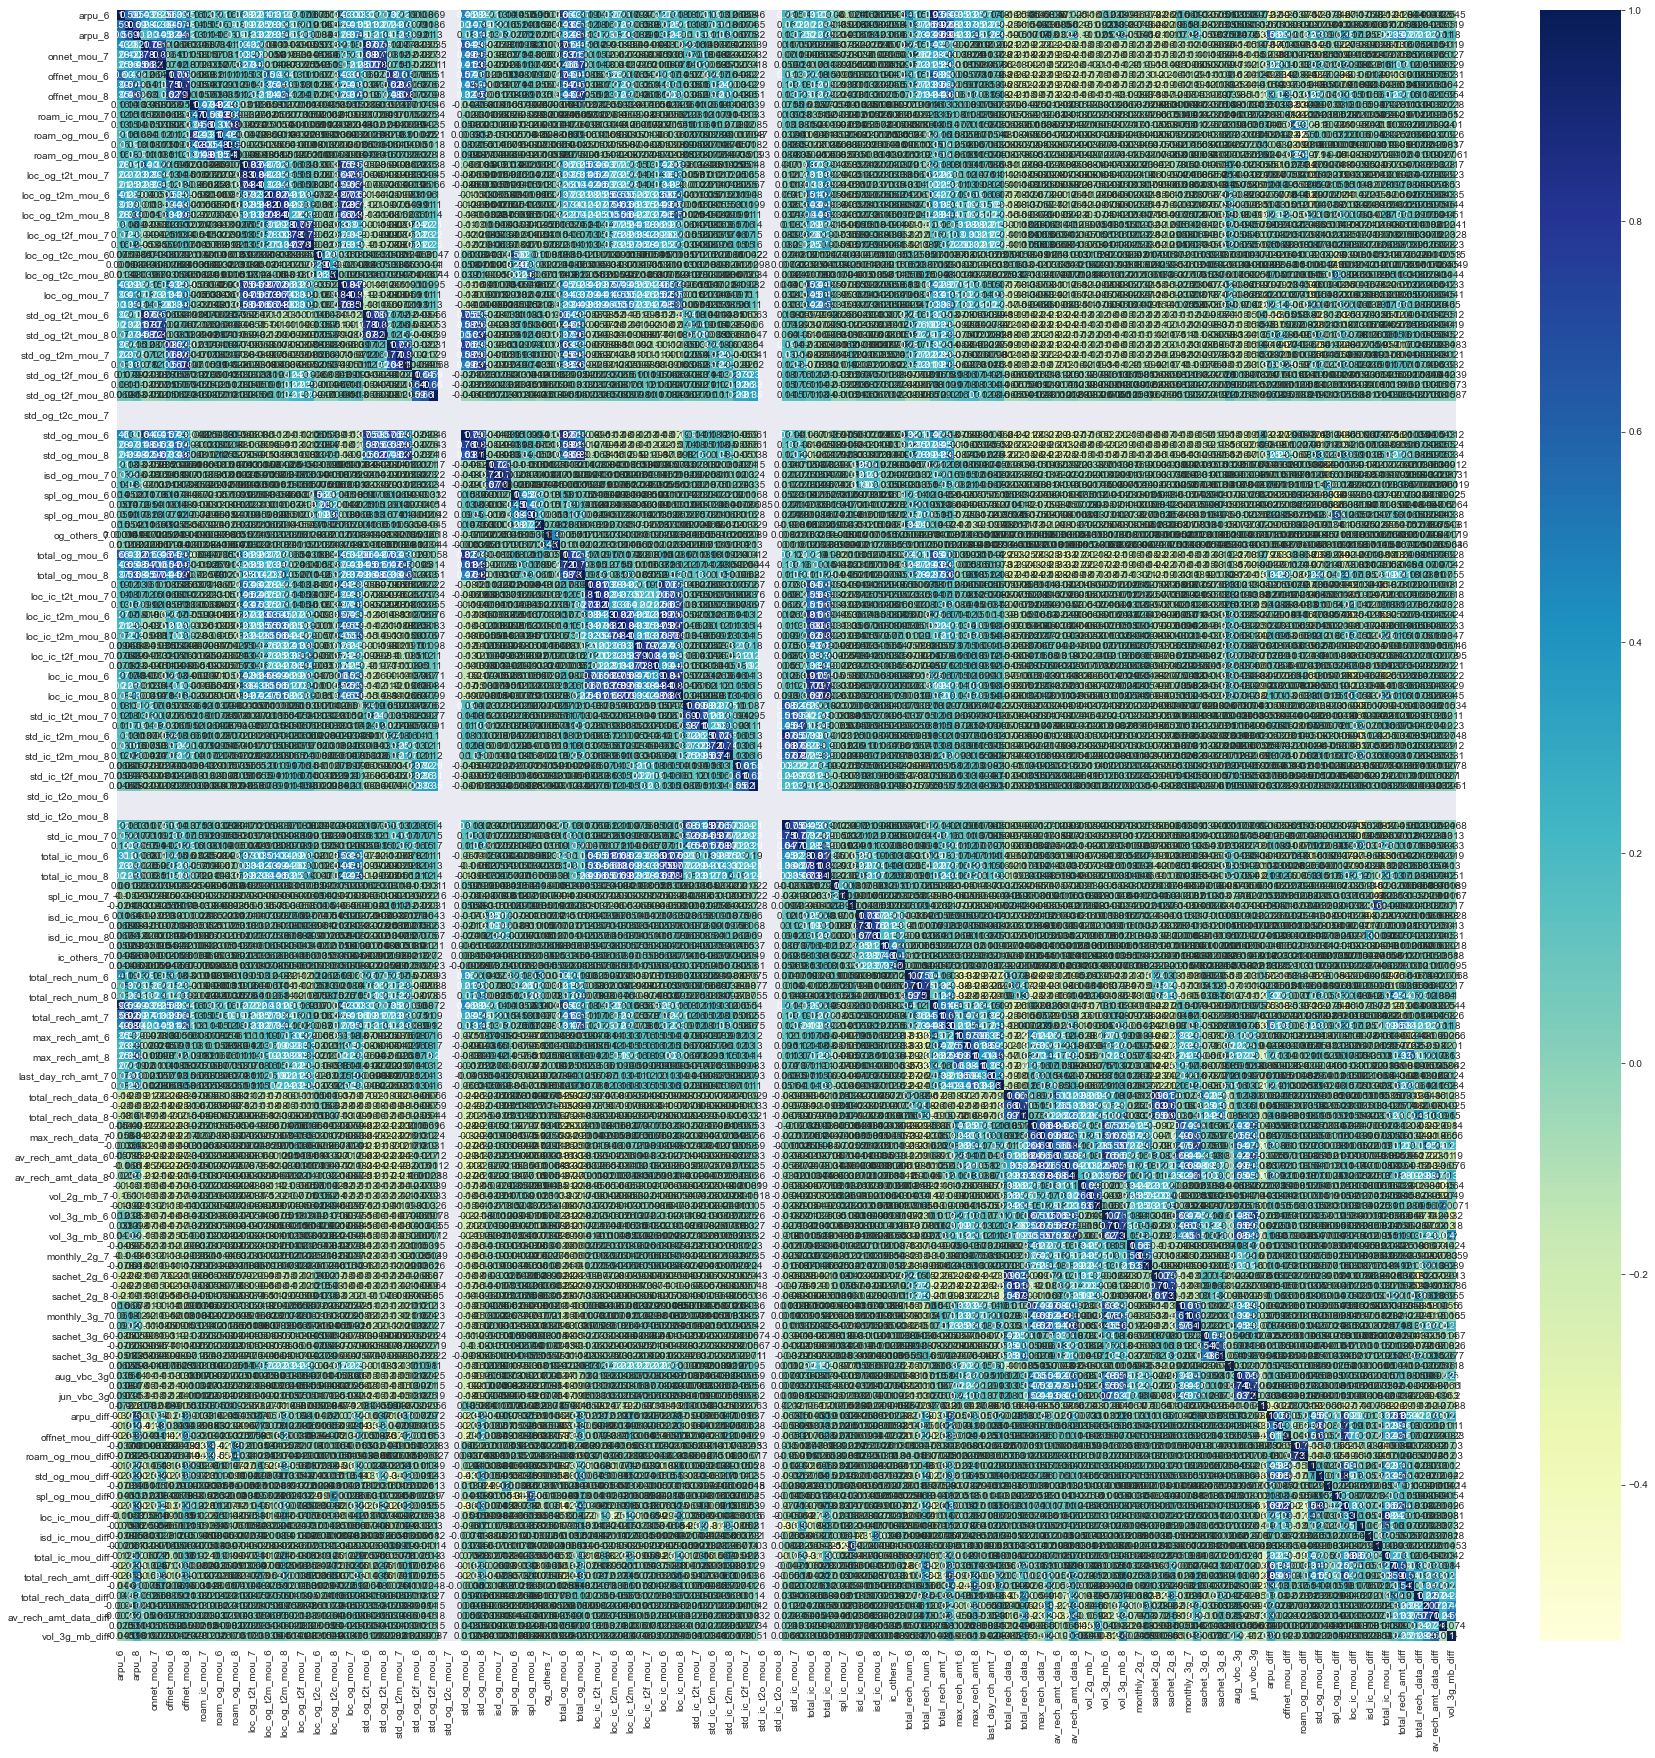

In [64]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (30, 30))
sns.heatmap(cor, annot = True, cmap="YlGnBu")
plt.show();

----

## Model Building and Prediction:

In [65]:
# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
#from imblearn.metrics import sensitivity_specificity_support

In [66]:
telchurn_churn_filtered['churn_probability'] = pd.to_numeric(telchurn_churn_filtered['churn_probability'])

In [67]:
X = telchurn_churn_filtered.drop("churn_probability", axis = 1)
y = telchurn_churn_filtered.churn_probability
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4, stratify = y)

In [68]:
X_train.shape, y_train.shape

((15759, 168), (15759,))

In [69]:
X_test.shape, y_test.shape

((5254, 168), (5254,))

### <ins>Aggregating the categorical columns:</ins>

In [70]:
# aggregate the categorical variables
train = pd.concat([X_train, y_train], axis=1)

In [71]:
train.groupby('night_pck_user_6').churn_probability.mean(), \
train.groupby('night_pck_user_7').churn_probability.mean(), \
train.groupby('night_pck_user_8').churn_probability.mean()

(night_pck_user_6
 -1.0    0.091037
  0.0    0.061534
  1.0    0.110355
 Name: churn_probability, dtype: float64,
 night_pck_user_7
 -1.0    0.106008
  0.0    0.051774
  1.0    0.049518
 Name: churn_probability, dtype: float64,
 night_pck_user_8
 -1.0    0.129077
  0.0    0.027976
  1.0    0.019661
 Name: churn_probability, dtype: float64)

In [72]:
train.groupby('fb_user_6').churn_probability.mean(), \
train.groupby('fb_user_7').churn_probability.mean(), \
train.groupby('fb_user_8').churn_probability.mean()

(fb_user_6
 -1.0    0.091037
  0.0    0.067671
  1.0    0.062284
 Name: churn_probability, dtype: float64,
 fb_user_7
 -1.0    0.106008
  0.0    0.059332
  1.0    0.051071
 Name: churn_probability, dtype: float64,
 fb_user_8
 -1.0    0.129077
  0.0    0.071381
  1.0    0.022682
 Name: churn_probability, dtype: float64)

In [73]:
mapping = {'night_pck_user_6' : {-1:  0.091037, 0: 0.061534, 1: 0.110355},
           'night_pck_user_7' : {-1: 0.106008, 0: 0.051774, 1: 0.049518},
           'night_pck_user_8' : {-1: 0.129077, 0: 0.027976, 1: 0.019661},
           'fb_user_6'        : {-1: 0.091037, 0: 0.067671, 1: 0.062284},
           'fb_user_7'        : {-1: 0.106008, 0: 0.059332, 1: 0.051071},
           'fb_user_8'        : {-1: 0.129077, 0: 0.071381, 1: 0.022682}
          }
X_train.replace(mapping, inplace = True)
X_test.replace(mapping, inplace = True)

In [74]:
cat_X_train = [col for col in cat_cols if col not in ['telchurn']]
X_train[cat_X_train].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15759 entries, 13528 to 20561
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   night_pck_user_6  15759 non-null  float64
 1   night_pck_user_7  15759 non-null  float64
 2   night_pck_user_8  15759 non-null  float64
 3   fb_user_6         15759 non-null  float64
 4   fb_user_7         15759 non-null  float64
 5   fb_user_8         15759 non-null  float64
dtypes: float64(6)
memory usage: 861.8 KB


In [75]:
X_train.shape

(15759, 168)

------

## PCA - Principal component analysis:

In [76]:
pca = Pipeline([('scaler', StandardScaler()), ('pca', PCA())])
pca.fit(X_train)
churn_pca = pca.fit_transform(X_train)
# extract pca model from pipeline
pca = pca.named_steps['pca']

# look at explainded variance of PCA components
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0       11.58
1       21.06
2       26.97
3       31.94
4       35.97
        ...  
163    100.00
164    100.00
165    100.00
166    100.00
167    100.00
Length: 168, dtype: float64


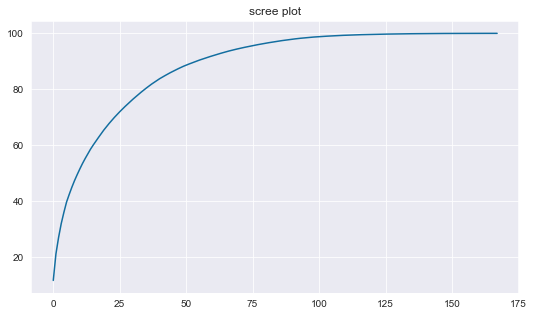

In [77]:
features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)

# 100 elements on y-axis; 175 elements on x-axis; 20 is normalising factor
plt.figure(figsize=(175/20,100/20)) 
plt.plot(cumulative_variance)
plt.title('scree plot');

---

## PCA and Logistic Regression:

In [78]:
PCA_VARS = 60
steps = [('scaler', StandardScaler()),
         ("pca", PCA(n_components=PCA_VARS)),
         ("logistic", LogisticRegression(class_weight='balanced'))
        ]
pipeline = Pipeline(steps)

In [79]:
y_train=y_train.round()
pipeline.fit(X_train, y_train)

# check score on train data
pipeline.score(X_train, y_train)

0.8236563233707722

In [80]:
X_train.shape

(15759, 168)

---

## Evaluate on test data:

In [81]:
y_test=y_test.round()
y_pred = pipeline.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
# sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
# print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[3927  892]
 [  80  355]]
AUC:    	 0.89


In [82]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.81      0.89      4819
         1.0       0.28      0.82      0.42       435

    accuracy                           0.81      5254
   macro avg       0.63      0.82      0.66      5254
weighted avg       0.92      0.81      0.85      5254



## Perform testing on `test.csv`, kaggle file:

In [83]:
X_test_sub = pd.read_csv("test.csv")
X_test_sub.shape

(30000, 171)

In [84]:
X_test_sub.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0  69999        109             0.0             0.0             0.0   
1  70000        109             0.0             0.0             0.0   
2  70001        109             0.0             0.0             0.0   
3  70002        109             0.0             0.0             0.0   
4  70003        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   91.882   
1            6/30/2014            7/31/2014            8/31/2014  414.168   
2            6/30/2014            7/31/2014            8/31/2014  329.844   
3            6/30/2014            7/31/2014            8/31/2014   43.550   
4            6/30/2014            7/31/2014            8/31/2014  306.854   

    arpu_7  ...  sachet_3g_6  sachet_3g_7  sachet_3g_8  fb_user_6  fb_user_7  \
0   65.330  ...            0            0            0        NaN        NaN   
1  515.568  ...            0            0            0        NaN        NaN   
2  434.884  ...            0            0            0        NaN        NaN   
3  171.390  ...            0            0            0        NaN        NaN   
4  406.289  ...            0            0            0        NaN        NaN   

   fb_user_8   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  
0        NaN  1692        0.00        0.00        0.00  
1        NaN  2533        0.00        0.00        0.00  
2        NaN   277      525.61      758.41      241.84  
3        NaN  1244        0.00        0.00        0.00  
4        NaN   462        0.00        0.00        0.00  

[5 rows x 171 columns]

In [85]:
final_col=list(X_train.columns)
len(final_col)

168

In [86]:
print(final_col)

['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'lo

In [87]:
adn_col =[]
for col in final_col:
    if col not in list(X_test_sub.columns):
        adn_col.append(col)

len(adn_col)

23

In [88]:
del_col =[]
for col in X_test_sub.columns:
    if col not in final_col:
        del_col.append(col)

In [89]:
X_test_sub = X_test_sub.drop(del_col, axis=1)
len(X_test_sub.columns)

145

In [90]:
X_test_sub['arpu_diff'] = X_test_sub.arpu_8 - ((X_test_sub.arpu_6 + X_test_sub.arpu_7)/2)
X_test_sub['onnet_mou_diff'] = X_test_sub.onnet_mou_8 - ((X_test_sub.onnet_mou_6 + X_test_sub.onnet_mou_7)/2)
X_test_sub['offnet_mou_diff'] = X_test_sub.offnet_mou_8 - ((X_test_sub.offnet_mou_6 + X_test_sub.offnet_mou_7)/2)
X_test_sub['roam_ic_mou_diff'] = X_test_sub.roam_ic_mou_8 - ((X_test_sub.roam_ic_mou_6 + X_test_sub.roam_ic_mou_7)/2)
X_test_sub['roam_og_mou_diff'] = X_test_sub.roam_og_mou_8 - ((X_test_sub.roam_og_mou_6 + X_test_sub.roam_og_mou_7)/2)
X_test_sub['loc_og_mou_diff'] = X_test_sub.loc_og_mou_8 - ((X_test_sub.loc_og_mou_6 + X_test_sub.loc_og_mou_7)/2)
X_test_sub['std_og_mou_diff'] = X_test_sub.std_og_mou_8 - ((X_test_sub.std_og_mou_6 + X_test_sub.std_og_mou_7)/2)
X_test_sub['isd_og_mou_diff'] = X_test_sub.isd_og_mou_8 - ((X_test_sub.isd_og_mou_6 + X_test_sub.isd_og_mou_7)/2)
X_test_sub['spl_og_mou_diff'] = X_test_sub.spl_og_mou_8 - ((X_test_sub.spl_og_mou_6 + X_test_sub.spl_og_mou_7)/2)
X_test_sub['total_og_mou_diff'] = X_test_sub.total_og_mou_8 - ((X_test_sub.total_og_mou_6 + X_test_sub.total_og_mou_7)/2)
X_test_sub['loc_ic_mou_diff'] = X_test_sub.loc_ic_mou_8 - ((X_test_sub.loc_ic_mou_6 + X_test_sub.loc_ic_mou_7)/2)
X_test_sub['std_ic_mou_diff'] = X_test_sub.std_ic_mou_8 - ((X_test_sub.std_ic_mou_6 + X_test_sub.std_ic_mou_7)/2)
X_test_sub['isd_ic_mou_diff'] = X_test_sub.isd_ic_mou_8 - ((X_test_sub.isd_ic_mou_6 + X_test_sub.isd_ic_mou_7)/2)
X_test_sub['spl_ic_mou_diff'] = X_test_sub.spl_ic_mou_8 - ((X_test_sub.spl_ic_mou_6 + X_test_sub.spl_ic_mou_7)/2)
X_test_sub['total_ic_mou_diff'] = X_test_sub.total_ic_mou_8 - ((X_test_sub.total_ic_mou_6 + X_test_sub.total_ic_mou_7)/2)
X_test_sub['total_rech_num_diff'] = X_test_sub.total_rech_num_8 - ((X_test_sub.total_rech_num_6 + X_test_sub.total_rech_num_7)/2)
X_test_sub['total_rech_amt_diff'] = X_test_sub.total_rech_amt_8 - ((X_test_sub.total_rech_amt_6 + X_test_sub.total_rech_amt_7)/2)
X_test_sub['max_rech_amt_diff'] = X_test_sub.max_rech_amt_8 - ((X_test_sub.max_rech_amt_6 + X_test_sub.max_rech_amt_7)/2)
X_test_sub['total_rech_data_diff'] = X_test_sub.total_rech_data_8 - ((X_test_sub.total_rech_data_6 + X_test_sub.total_rech_data_7)/2)
X_test_sub['max_rech_data_diff'] = X_test_sub.max_rech_data_8 - ((X_test_sub.max_rech_data_6 + X_test_sub.max_rech_data_7)/2)
X_test_sub['av_rech_amt_data_diff'] = X_test_sub.av_rech_amt_data_8 - ((X_test_sub.av_rech_amt_data_6 + X_test_sub.av_rech_amt_data_7)/2)
X_test_sub['vol_2g_mb_diff'] = X_test_sub.vol_2g_mb_8 - ((X_test_sub.vol_2g_mb_6 + X_test_sub.vol_2g_mb_7)/2)
X_test_sub['vol_3g_mb_diff'] = X_test_sub.vol_3g_mb_8 - ((X_test_sub.vol_3g_mb_6 + X_test_sub.vol_3g_mb_7)/2)

In [91]:
X_test_sub.shape, X_train.shape

((30000, 168), (15759, 168))

In [92]:
X_train

arpu_6    arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
13528  559.135   508.842  553.107       597.83       448.53       594.29   
7183   381.035   660.847  199.111       364.79       617.33        51.71   
14666  276.101   518.185  267.706        84.68       117.61        87.43   
17922  413.743   476.101  409.262       636.51       728.43       700.23   
5165   497.504   444.456  293.627       739.41       185.51        66.08   
...        ...       ...      ...          ...          ...          ...   
10248  593.710   176.365  468.511       319.28         6.16        41.21   
6594   795.701  1075.717  820.655      1208.24      1380.31      1310.78   
492    407.097   488.824  260.994       107.61       142.88        77.16   
19099  490.151   441.268  393.735       337.76       218.16       396.83   
20561  443.074   553.529  578.308       455.09       536.81       863.24   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  ...  \
13528        149.26        175.73        299.99       4.180000  ...   
7183         124.69        258.86         40.08       0.000000  ...   
14666        552.86        510.43        383.46       0.000000  ...   
17922        177.04        137.53        162.48       0.000000  ...   
5165         481.24        673.68        534.98       0.000000  ...   
...             ...           ...           ...            ...  ...   
10248        191.86        227.69        467.46     248.466563  ...   
6594         245.46        782.89        478.08       0.000000  ...   
492          446.93        483.16        195.24       0.000000  ...   
19099        427.83        403.36        229.94       0.000000  ...   
20561        285.44        645.48        491.54       0.000000  ...   

       spl_ic_mou_diff  total_ic_mou_diff  total_rech_num_diff  \
13528             0.00            -61.735                 -1.0   
7183              0.00           -139.375                -18.0   
14666             0.00           -312.175                 -2.0   
17922             0.00            -30.925                  0.5   
5165              0.00            -28.100                 -6.5   
...                ...                ...                  ...   
10248             0.00             42.745                 -2.5   
6594              0.00           -122.420                -20.0   
492              -0.13           -240.415                  0.0   
19099             0.00             34.625                 -4.5   
20561             0.25            -18.230                  1.0   

       total_rech_amt_diff  max_rech_amt_diff  total_rech_data_diff  \
13528                 45.0               31.0                   0.0   
7183                -438.0                7.0                   0.0   
14666               -196.0               17.5                   0.0   
17922                 76.0               20.0                   0.0   
5165                -201.0               20.0                   0.0   
...                    ...                ...                   ...   
10248                136.0               35.0                  -0.5   
6594                   7.5               61.5                   0.0   
492                 -186.0              -40.0                   0.0   
19099                -75.5                0.0                  -1.0   
20561                 95.5               20.0                   0.0   

       max_rech_data_diff  av_rech_amt_data_diff  vol_2g_mb_diff  \
13528                 0.0                    0.0           0.000   
7183                  0.0                    0.0           0.000   
14666                 0.0                    0.0          21.065   
17922                 0.0                    0.0           0.000   
5165                  0.0                    0.0           0.000   
...                   ...                    ...             ...   
10248                 0.0                  -72.5         -14.460   
6594                  0.0                    0.0    

In [93]:
X_test_sub

arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0        91.882   65.330   64.445        31.78        20.23        23.11   
1       414.168  515.568  360.868        75.51        41.21        19.84   
2       329.844  434.884  746.239         7.54         7.86         8.40   
3        43.550  171.390   24.400         5.31         2.16         0.00   
4       306.854  406.289  413.329       450.93       609.03       700.68   
...         ...      ...      ...          ...          ...          ...   
29995   718.870  396.259  406.150       324.46       250.01       285.41   
29996   218.327  324.070  374.981       263.79       467.24       650.26   
29997   139.473   38.230  180.194        11.08        14.89        19.94   
29998  1122.912  781.121  257.439       122.74        50.23        26.46   
29999   318.980  307.890  605.320        28.09        32.93        66.31   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  ...  \
0             60.16         32.16         34.83           0.00  ...   
1            474.34        621.84        394.94           0.00  ...   
2             16.98         45.81         45.04          22.81  ...   
3             40.04        205.01         24.01           0.00  ...   
4             60.94         23.84         74.16           0.00  ...   
...             ...           ...           ...            ...  ...   
29995        190.36        166.14        221.96          87.76  ...   
29996        108.53        124.11        189.76           3.40  ...   
29997         37.24         16.74         45.28           0.00  ...   
29998       1854.09       1088.83        306.16           0.00  ...   
29999        107.78        241.53        331.64         134.54  ...   

       spl_ic_mou_diff  total_ic_mou_diff  total_rech_num_diff  \
0                -0.05             -6.385                 -1.0   
1                 0.00            -36.325                  0.5   
2                 0.00              0.000                 -2.5   
3                 0.00             10.065                 -2.0   
4                 0.00             74.430                 -1.0   
...                ...                ...                  ...   
29995             0.00            199.105                 -3.0   
29996             0.00             38.470                  1.0   
29997             0.00              6.160                  5.5   
29998             0.00            -27.575                -25.0   
29999             0.33             88.320                 -0.5   

       total_rech_amt_diff  max_rech_amt_diff  total_rech_data_diff  \
0                    -36.5              -10.0                   NaN   
1                      0.0                0.0                   NaN   
2                    250.0              100.0                   NaN   
3                   -185.0             -130.0                   NaN   
4                    123.0               20.0                   NaN   
...                    ...                ...                   ...   
29995               -174.0               -4.5                   NaN   
29996                188.5               69.5                   NaN   
29997                165.0               25.0                   NaN   
29998               -774.0              -38.0                   NaN   
29999               -440.0             -227.5                  -1.0   

       max_rech_data_diff  av_rech_amt_data_diff  vol_2g_mb_diff  \
0                     NaN                    NaN           0.000   
1                     NaN                    NaN           0.000   
2                     NaN                    NaN           0.000   
3                     NaN                    NaN           0.000   
4                     NaN                    NaN           0.000   
...                   ...                    ...             ...   
29995                 NaN                    NaN         -10.990   
29996                 NaN                    NaN     

In [94]:
X_test_sub.isna().any()

arpu_6                   False
arpu_7                   False
arpu_8                   False
onnet_mou_6               True
onnet_mou_7               True
                         ...  
total_rech_data_diff      True
max_rech_data_diff        True
av_rech_amt_data_diff     True
vol_2g_mb_diff           False
vol_3g_mb_diff           False
Length: 168, dtype: bool

In [95]:
nan_test_list = X_test_sub.columns[X_test_sub.isna().any()].tolist()
for i in nan_test_list:
    X_test_sub[i] = X_test_sub[i].fillna(0)

In [96]:
X_test_sub.isna().any()

arpu_6                   False
arpu_7                   False
arpu_8                   False
onnet_mou_6              False
onnet_mou_7              False
                         ...  
total_rech_data_diff     False
max_rech_data_diff       False
av_rech_amt_data_diff    False
vol_2g_mb_diff           False
vol_3g_mb_diff           False
Length: 168, dtype: bool

In [97]:
mapping = {'night_pck_user_6' : {-1:  0.091037, 0: 0.061534, 1: 0.110355},
           'night_pck_user_7' : {-1: 0.106008, 0: 0.051774, 1: 0.049518},
           'night_pck_user_8' : {-1: 0.129077, 0: 0.027976, 1: 0.019661},
           'fb_user_6'        : {-1: 0.091037, 0: 0.067671, 1: 0.062284},
           'fb_user_7'        : {-1: 0.106008, 0: 0.059332, 1: 0.051071},
           'fb_user_8'        : {-1: 0.129077, 0: 0.071381, 1: 0.022682}
          }
#X_train.replace(mapping, inplace = True)
X_test_sub.replace(mapping, inplace = True)

In [98]:
y_pred = pipeline.predict(X_test_sub)

In [99]:
X_test_sub.shape

(30000, 168)

In [100]:
len(y_pred)

30000

In [101]:
id = range(69999, 69999+30000)
len(id)

30000

----

## Hyperparameter tuning - PCA and Logistic Regression:

In [102]:
y_train.value_counts()/y_train.shape

0.0    0.917254
1.0    0.082746
Name: churn_probability, dtype: float64

In [103]:
# PCA
pca = PCA()

# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
logistic = LogisticRegression(class_weight={0:0.1, 1: 0.9})

# create pipeline
steps = [("scaler", StandardScaler()), 
         ("pca", pca),
         ("logistic", logistic)
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [60, 80], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [104]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2'],
                         'pca__n_components': [60, 80]},
             scoring='roc_auc', verbose=1)

In [105]:
telchurn_result = pd.DataFrame(model.cv_results_) 

In [106]:
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.8985566780774261
Best hyperparameters:  {'logistic__C': 0.1, 'logistic__penalty': 'l2', 'pca__n_components': 80}


In [107]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
# sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
# print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[4081  738]
 [  85  350]]
AUC:    	 0.89


In [108]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.85      0.91      4819
         1.0       0.32      0.80      0.46       435

    accuracy                           0.84      5254
   macro avg       0.65      0.83      0.68      5254
weighted avg       0.93      0.84      0.87      5254



------

## Random Forest model:

In [109]:
X_train.columns

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'spl_ic_mou_diff', 'total_ic_mou_diff', 'total_rech_num_diff',
       'total_rech_amt_diff', 'max_rech_amt_diff', 'total_rech_data_diff',
       'max_rech_data_diff', 'av_rech_amt_data_diff', 'vol_2g_mb_diff',
       'vol_3g_mb_diff'],
      dtype='object', length=168)

In [110]:
# random forest - the class weight is used to handle class imbalance - it adjusts the cost function
forest = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1)

# hyperparameter space
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.4]}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=forest, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [111]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=RandomForestClassifier(class_weight={0: 0.1, 1: 0.9},
                                              n_jobs=-1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 0.4]},
             scoring='roc_auc', verbose=1)

In [112]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.926888306882045
Best hyperparameters:  {'criterion': 'entropy', 'max_features': 'auto'}


In [113]:
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[4738   81]
 [ 228  207]]
AUC:    	 0.93


In [114]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97      4819
         1.0       0.72      0.48      0.57       435

    accuracy                           0.94      5254
   macro avg       0.84      0.73      0.77      5254
weighted avg       0.93      0.94      0.94      5254



### Perform testing on `test.csv`, kaggle file for Random forest:

In [115]:
X_test_sub = pd.read_csv("test.csv")
X_test_sub.shape
final_col=list(X_train.columns)
print(final_col)

['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'lo

In [116]:
len(final_col)

168

In [117]:
adn_col =[]
for col in final_col:
    if col not in list(X_test_sub.columns):
        adn_col.append(col)
len(adn_col)

23

In [118]:
del_col =[]
for col in X_test_sub.columns:
    if col not in final_col:
        del_col.append(col)
X_test_sub = X_test_sub.drop(del_col, axis=1)

len(X_test_sub.columns)

145

In [119]:
X_test_sub['arpu_diff'] = X_test_sub.arpu_8 - ((X_test_sub.arpu_6 + X_test_sub.arpu_7)/2)
X_test_sub['onnet_mou_diff'] = X_test_sub.onnet_mou_8 - ((X_test_sub.onnet_mou_6 + X_test_sub.onnet_mou_7)/2)
X_test_sub['offnet_mou_diff'] = X_test_sub.offnet_mou_8 - ((X_test_sub.offnet_mou_6 + X_test_sub.offnet_mou_7)/2)
X_test_sub['roam_ic_mou_diff'] = X_test_sub.roam_ic_mou_8 - ((X_test_sub.roam_ic_mou_6 + X_test_sub.roam_ic_mou_7)/2)
X_test_sub['roam_og_mou_diff'] = X_test_sub.roam_og_mou_8 - ((X_test_sub.roam_og_mou_6 + X_test_sub.roam_og_mou_7)/2)
X_test_sub['loc_og_mou_diff'] = X_test_sub.loc_og_mou_8 - ((X_test_sub.loc_og_mou_6 + X_test_sub.loc_og_mou_7)/2)
X_test_sub['std_og_mou_diff'] = X_test_sub.std_og_mou_8 - ((X_test_sub.std_og_mou_6 + X_test_sub.std_og_mou_7)/2)
X_test_sub['isd_og_mou_diff'] = X_test_sub.isd_og_mou_8 - ((X_test_sub.isd_og_mou_6 + X_test_sub.isd_og_mou_7)/2)
X_test_sub['spl_og_mou_diff'] = X_test_sub.spl_og_mou_8 - ((X_test_sub.spl_og_mou_6 + X_test_sub.spl_og_mou_7)/2)
X_test_sub['total_og_mou_diff'] = X_test_sub.total_og_mou_8 - ((X_test_sub.total_og_mou_6 + X_test_sub.total_og_mou_7)/2)
X_test_sub['loc_ic_mou_diff'] = X_test_sub.loc_ic_mou_8 - ((X_test_sub.loc_ic_mou_6 + X_test_sub.loc_ic_mou_7)/2)
X_test_sub['std_ic_mou_diff'] = X_test_sub.std_ic_mou_8 - ((X_test_sub.std_ic_mou_6 + X_test_sub.std_ic_mou_7)/2)
X_test_sub['isd_ic_mou_diff'] = X_test_sub.isd_ic_mou_8 - ((X_test_sub.isd_ic_mou_6 + X_test_sub.isd_ic_mou_7)/2)
X_test_sub['spl_ic_mou_diff'] = X_test_sub.spl_ic_mou_8 - ((X_test_sub.spl_ic_mou_6 + X_test_sub.spl_ic_mou_7)/2)
X_test_sub['total_ic_mou_diff'] = X_test_sub.total_ic_mou_8 - ((X_test_sub.total_ic_mou_6 + X_test_sub.total_ic_mou_7)/2)
X_test_sub['total_rech_num_diff'] = X_test_sub.total_rech_num_8 - ((X_test_sub.total_rech_num_6 + X_test_sub.total_rech_num_7)/2)
X_test_sub['total_rech_amt_diff'] = X_test_sub.total_rech_amt_8 - ((X_test_sub.total_rech_amt_6 + X_test_sub.total_rech_amt_7)/2)
X_test_sub['max_rech_amt_diff'] = X_test_sub.max_rech_amt_8 - ((X_test_sub.max_rech_amt_6 + X_test_sub.max_rech_amt_7)/2)
X_test_sub['total_rech_data_diff'] = X_test_sub.total_rech_data_8 - ((X_test_sub.total_rech_data_6 + X_test_sub.total_rech_data_7)/2)
X_test_sub['max_rech_data_diff'] = X_test_sub.max_rech_data_8 - ((X_test_sub.max_rech_data_6 + X_test_sub.max_rech_data_7)/2)
X_test_sub['av_rech_amt_data_diff'] = X_test_sub.av_rech_amt_data_8 - ((X_test_sub.av_rech_amt_data_6 + X_test_sub.av_rech_amt_data_7)/2)
X_test_sub['vol_2g_mb_diff'] = X_test_sub.vol_2g_mb_8 - ((X_test_sub.vol_2g_mb_6 + X_test_sub.vol_2g_mb_7)/2)
X_test_sub['vol_3g_mb_diff'] = X_test_sub.vol_3g_mb_8 - ((X_test_sub.vol_3g_mb_6 + X_test_sub.vol_3g_mb_7)/2)

In [120]:
X_test_sub.shape

(30000, 168)

In [121]:
X_test_sub.isna().any()

arpu_6                   False
arpu_7                   False
arpu_8                   False
onnet_mou_6               True
onnet_mou_7               True
                         ...  
total_rech_data_diff      True
max_rech_data_diff        True
av_rech_amt_data_diff     True
vol_2g_mb_diff           False
vol_3g_mb_diff           False
Length: 168, dtype: bool

In [122]:
nan_test_list = X_test_sub.columns[X_test_sub.isna().any()].tolist()
for i in nan_test_list:
    X_test_sub[i] = X_test_sub[i].fillna(0)

In [123]:
X_test_sub.isna().any()

arpu_6                   False
arpu_7                   False
arpu_8                   False
onnet_mou_6              False
onnet_mou_7              False
                         ...  
total_rech_data_diff     False
max_rech_data_diff       False
av_rech_amt_data_diff    False
vol_2g_mb_diff           False
vol_3g_mb_diff           False
Length: 168, dtype: bool

In [124]:
mapping = {'night_pck_user_6' : {-1:  0.091037, 0: 0.061534, 1: 0.110355},
           'night_pck_user_7' : {-1: 0.106008, 0: 0.051774, 1: 0.049518},
           'night_pck_user_8' : {-1: 0.129077, 0: 0.027976, 1: 0.019661},
           'fb_user_6'        : {-1: 0.091037, 0: 0.067671, 1: 0.062284},
           'fb_user_7'        : {-1: 0.106008, 0: 0.059332, 1: 0.051071},
           'fb_user_8'        : {-1: 0.129077, 0: 0.071381, 1: 0.022682}
          }
#X_train.replace(mapping, inplace = True)
X_test_sub.replace(mapping, inplace = True)

In [125]:
y_pred = model.predict(X_test_sub)

In [126]:
telchurn_res = pd.DataFrame(
    {'id': id,
     'churn_probability': y_pred
     
    })
telchurn_res['churn_probability'] = telchurn_res['churn_probability'].astype(int)

**Exporting the csv file for Kaggle submissioon:**

In [127]:
telchurn_res.to_csv("Submission.csv", index = False)

---------

## Choosing best features:

In [128]:
# run a random forest model on train data
max_features = int(round(np.sqrt(X_train.shape[1])))    # number of variables to consider to split each node
print(max_features)

13


In [129]:
rf_model = RandomForestClassifier(n_estimators=100, 
                                  max_features=max_features, 
                                  class_weight={0:0.1, 1: 0.9}, 
                                  oob_score=True, 
                                  random_state=4, 
                                  verbose=1)

In [130]:
# fit model
rf_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   11.8s finished


RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, max_features=13,
                       oob_score=True, random_state=4, verbose=1)

In [131]:
rf_model.oob_score_

0.941747572815534

In [132]:
# predict churn on test data
y_pred = rf_model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
# sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
# print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

print(classification_report(y_test, y_pred))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[[4749   70]
 [ 240  195]]
ROC:    	 0.93
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      4819
         1.0       0.74      0.45      0.56       435

    accuracy                           0.94      5254
   macro avg       0.84      0.72      0.76      5254
weighted avg       0.93      0.94      0.93      5254



[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


------

## Feature Importance:

In [133]:
# predictors
features = telchurn_churn_filtered.drop('churn_probability', axis=1).columns

# feature_importance
importance = rf_model.feature_importances_

# create dataframe
feature_importance = pd.DataFrame({'variables': features, 'importance_percentage': importance*100})
feature_importance = feature_importance[['variables', 'importance_percentage']]

# sort features
feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_importance.importance_percentage.sum())
feature_importance

Sum of importance= 100.00000000000001


variables  importance_percentage
0        loc_ic_mou_8               5.765741
1      total_ic_mou_8               5.461674
2    loc_og_t2m_mou_8               3.820271
3    loc_ic_t2m_mou_8               3.637759
4        loc_og_mou_8               3.102838
..                ...                    ...
163  std_og_t2c_mou_7               0.000000
164  std_ic_t2o_mou_7               0.000000
165  std_ic_t2o_mou_8               0.000000
166  std_og_t2c_mou_6               0.000000
167  std_ic_t2o_mou_6               0.000000

[168 rows x 2 columns]

### Extracting top 30 features:

In [134]:
top_n = 30
top_features = feature_importance.variables[0:top_n]

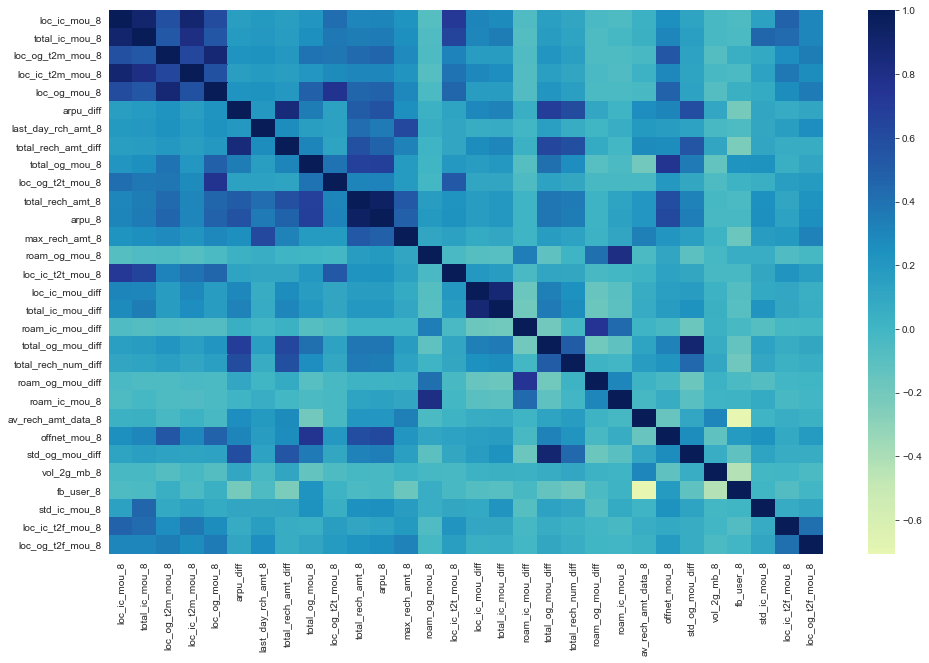

In [135]:
import seaborn as sns
plt.rcParams["figure.figsize"] =(16,10)
sns.heatmap(data=X_train[top_features].corr(), center=0.0, cmap="YlGnBu");

### Top Features:

In [136]:
top_features_10 = top_features[0:9]

X_train = X_train[top_features_10]
X_test = X_test[top_features_10]

In [137]:
# logistic regression
steps = [('scaler', StandardScaler()), 
         ("logistic", LogisticRegression(class_weight={0:0.1, 1:0.9}))
        ]

# compile pipeline
logistic = Pipeline(steps)

# hyperparameter space
params = {'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [138]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=1)

In [139]:
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.870941852021421
Best hyperparameters:  {'logistic__C': 10, 'logistic__penalty': 'l2'}


In [140]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


y_pred_prob = model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[3964  855]
 [ 100  335]]
ROC:    	 0.85


In [141]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.82      0.89      4819
         1.0       0.28      0.77      0.41       435

    accuracy                           0.82      5254
   macro avg       0.63      0.80      0.65      5254
weighted avg       0.92      0.82      0.85      5254



-------

## Extraction of the intercept and the coefficients from the logistic model:

In [142]:
logistic_model = model.best_estimator_.named_steps['logistic']
# intercept
intercept_telchurn = pd.DataFrame(logistic_model.intercept_.reshape((1,1)), columns = ['intercept'])
# coefficients
coefficients = logistic_model.coef_.reshape(9, 1).tolist()
coefficients = [val for sublist in coefficients for val in sublist]
coefficients = [round(coefficient, 3) for coefficient in coefficients]

logistic_features = list(X_train.columns)
coefficients_telchurn = pd.DataFrame(logistic_model.coef_, columns=logistic_features)
# concatenate dataframes
coefficients = pd.concat([intercept_telchurn, coefficients_telchurn], axis=1)
coefficients

intercept  loc_ic_mou_8  total_ic_mou_8  loc_og_t2m_mou_8  \
0  -1.490875     -0.680075       -0.482281         -0.258217   

   loc_ic_t2m_mou_8  loc_og_mou_8  arpu_diff  last_day_rch_amt_8  \
0         -0.425098     -0.084777  -0.287468           -0.222731   

   total_rech_amt_diff  total_og_mou_8  
0             -0.58333        -0.01796

-----

## Business Insights:

- To reduce the customer churning, businees should reduce the tariff for local outgoing calls per minute and come up with new  std+local combo  packages.
- To improve the average revenue spent by the customershe business should give  attractive offers.

----

## `Credentials:`
===================

Please find the contributors details below:

> **<ins>Primary Author:</ins>**
> + Name: Vamsi Krishna P 
> + Phone no: +91 9491392912 
> + Email ID: vamshi.krishna.prime@gmail.com 
> + LinkedIn: https://www.linkedin.com/in/vamshi-krishna-prime/
> + GitHub: https://github.com/vamshi-krishna-prime
> + Website: https://www.vamshi-krishna.com
> + Other work sample: https://self-driving-car-lane-detection.streamlit.app/

----

<div style="background-color:#bf283c;">
    </p>
    <p style="color:DarkTurquoise;font-size:1px"> |
    </p>
    <h2 style="color:White;font-family:'Arial';font-size:30px"><center>End of Case Study</center></h2>
    </p>
    <p style="color:DarkTurquoise;font-size:1px"> |
    </p>
</div>

